# Introduction

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, ggtitle, aes, labs, geom_point, geom_histogram, geom_bar, scale_fill_manual, theme, element_text, xlab, ylab
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression



# Reading the data

We read the file contaning the date and display it.

In [4]:
fd = pd.read_csv('./Subject6_smoking.csv')
fd

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
2,No,Dead,57.5
3,No,Alive,47.1
4,Yes,Alive,81.4
...,...,...,...
1309,Yes,Alive,35.9
1310,No,Alive,22.3
1311,Yes,Dead,62.1
1312,No,Dead,88.6


Each row shows :
 1. Whether the person smokes or not, 
 2. Whether he/she is alive or dead at the time of the second survey, 
 3. His/Her age at the time of the first survey.

# Analyzing the data

## Total number of women who lived/died according to her smoking habits 

In [5]:
grouped_df = fd.groupby(['Smoker', 'Status']).size().reset_index(name="Count")
grouped_df

,Smoker,Status,Count
0,No,Alive,502
1,No,Dead,230
2,Yes,Alive,443
3,Yes,Dead,139


From the table below, we can notice that there are as many living women who smoke as those who do not smoke.

So we can think at firstsight, that smoking has no effect on the fact that these women are alive or dead.

## Mortality rate in each group (smokers and no smokers)

In [6]:
ratiodf = grouped_df.assign(Rate=grouped_df.Count/grouped_df.groupby('Smoker').Count.transform('sum'))
ratiodf

,Smoker,Status,Count,Rate
0,No,Alive,502,0.685792
1,No,Dead,230,0.314208
2,Yes,Alive,443,0.761168
3,Yes,Dead,139,0.238832


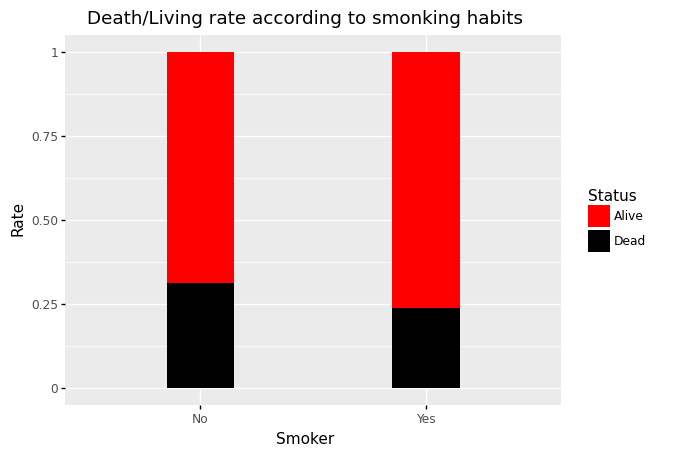

<ggplot: (-9223371837787752220)>

In [7]:
(ggplot(ratiodf, aes(x="Smoker", y="Rate", fill="Status")) 
        +geom_bar(stat='identity', width=0.3)
        + ggtitle("Death/Living rate according to smonking habits")
        +scale_fill_manual(values = ['red', 'black']))

After plotting bars showing rate of Alive and Dead women according to their smoking habits, we can easily see that in fact the dead rate is oddly smaller in women smokers.

## Total number of women who lived/died according to her smoking habits AND age 


We first define 4 groups (0,1,2,3) such as:

- **Group 0** refers to $18 <= Age <= 34$
- **Group 1** refers to $34< Age<=54$
- **Group 2** refers to $54< Age<=64$
- **Group 3** refers to $64< Age$


In [9]:
fd.loc[(fd['Age']>=18) & (fd['Age']<=34), "Age" ] = 0
fd.loc[(fd['Age']>34) & (fd['Age']<=54),"Age"  ] = 1
fd.loc[(fd['Age']>54) & (fd['Age']<=64),"Age"  ] = 2
fd.loc[fd['Age']>64, "Age"  ] = 3
fd

,Smoker,Status,Age
0,Yes,Alive,0.0
1,Yes,Alive,0.0
2,No,Dead,2.0
3,No,Alive,1.0
4,Yes,Alive,3.0
...,...,...,...
1309,Yes,Alive,1.0
1310,No,Alive,0.0
1311,Yes,Dead,2.0
1312,No,Dead,3.0


Then, we measure the total number of alive/dead women according to their smoking habits AND age category

In [10]:
grouped_df = fd.groupby(['Smoker', 'Status',"Age"]).size().reset_index(name="Count")
grouped_df

,Smoker,Status,Age,Count
0,No,Alive,0.0,213
1,No,Alive,1.0,180
2,No,Alive,2.0,81
3,No,Alive,3.0,28
4,No,Dead,0.0,6
5,No,Dead,1.0,19
6,No,Dead,2.0,40
7,No,Dead,3.0,165
8,Yes,Alive,0.0,176
9,Yes,Alive,1.0,196


In [12]:
ratiodf = grouped_df.assign(Rate=grouped_df.Count/grouped_df.groupby('Smoker').Count.transform('sum'))
ratiodf

,Smoker,Status,Age,Count,Rate
0,No,Alive,0.0,213,0.290984
1,No,Alive,1.0,180,0.245902
2,No,Alive,2.0,81,0.110656
3,No,Alive,3.0,28,0.038251
4,No,Dead,0.0,6,0.008197
5,No,Dead,1.0,19,0.025956
6,No,Dead,2.0,40,0.054645
7,No,Dead,3.0,165,0.225410
8,Yes,Alive,0.0,176,0.302405
9,Yes,Alive,1.0,196,0.336770


C:\Users\SNOW\Anaconda3\lib\site-packages\plotnine\scales\scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.


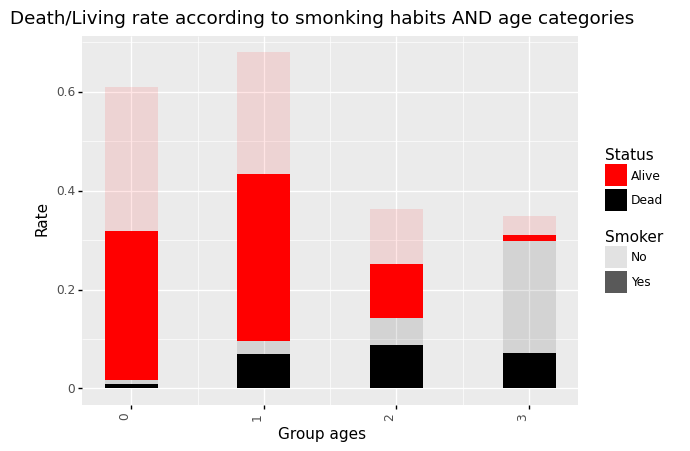

<ggplot: (-9223371837787476441)>

In [13]:
(ggplot(ratiodf, aes(x="Age", y="Rate", fill="Status", alpha = 'Smoker')) 
        +geom_bar(stat='identity', width= 0.4) 
        +scale_fill_manual(values = ['red', 'black'])
        + xlab('Group ages') 
        + ggtitle("Death/Living rate according to smonking habits AND age categories")
        +theme(axis_text_x  = element_text(angle = 90, hjust = 1))
)



This plot represent the rate of dead and alive women according to its age category and smoking habits.
It clearly shows that: 
- The older women get, the higher the death rate, which fully reflects reality.
- The death rate for women having her age between 34 and 64 is much bigger for those who used to smoke than the ones who don't. 
- Also, the death rate of smokers increases significanlty as the women become older.

## Performing Logistic regression for Death ~ Age model

In order to avoid a bias induced by groupings in arbitrary and non-regular age groups, we perform a logistic regression.

Thus, we can study the Death_status ~ Age model in order to measure the probability of death as a function of age depending on whether we consider the group of female smokers or non-smokers. 

In [13]:
fd = pd.read_csv('./Subject6_smoking.csv')

First, we introduce a Death variable equal to 1 or 0 to indicate whether the individual died during the 20-year period or not.

In [14]:
fd['Death'] = np.where((fd['Status']=="Dead"), 1, 0)

In [15]:
fd

,Smoker,Status,Age,Death
0,Yes,Alive,21.0,0
1,Yes,Alive,19.3,0
2,No,Dead,57.5,1
3,No,Alive,47.1,0
4,Yes,Alive,81.4,0
...,...,...,...,...
1309,Yes,Alive,35.9,0
1310,No,Alive,22.3,0
1311,Yes,Dead,62.1,1
1312,No,Dead,88.6,1


Second, we select two datasets defined as follows:
  1. The first dataset contains women's age who used to smoke
  2. The second dataset contains also women' age who do not used to smoke.

In [16]:
smokerAge = fd.loc[fd['Smoker'] == 'Yes', 'Age' ].values
smokerDeath = fd.loc[fd['Smoker'] == 'Yes', 'Death' ]

nosmokerAge = fd.loc[fd['Smoker'] == 'No', 'Age' ].values
nosmokerDeath = fd.loc[fd['Smoker'] == 'No', 'Death' ]

Third, we do a logistic regression for each dataset using sklearn framework.

In [17]:

modelSmokLR = LogisticRegression().fit(smokerAge.reshape(-1,1), smokerDeath)
modelNoSmokLR = LogisticRegression().fit(nosmokerAge.reshape(-1, 1), nosmokerDeath)

C:\Users\SNOW\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
C:\Users\SNOW\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


Fourth, we create 100 random samples in which we do the prediction using the two resulting logistic regression models. 

In [18]:
data_pred = np.linspace(start=fd["Age"].min(), stop=fd["Age"].max(), num=100)


Finally, we plot the estimated probability of death per age according to the smoking habits

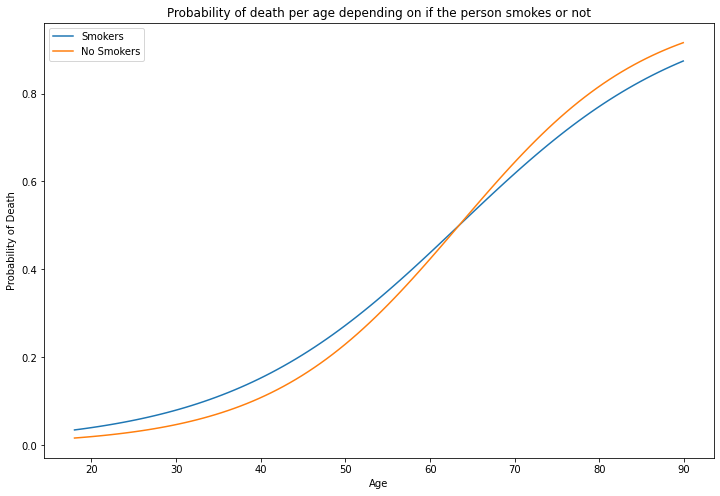

In [19]:
predictProbaSmok= modelSmokLR.predict_proba(data_pred.reshape([-1, 1]))
predictProbaNoSmok= modelNoSmokLR.predict_proba(data_pred.reshape([-1, 1]))



plt.figure(figsize=(12, 8))
plt.plot(data_pred, predictProbaSmok[:, 1], label="Smokers")
plt.plot(data_pred, predictProbaNoSmok[:, 1], label="No Smokers")

plt.title("Probability of death per age depending on if the person smokes or not")
plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.legend(loc='upper left')
plt.show()

From this plot, we may think without any certainty, that the probability to a woman aged between 18 and 65 years old to die is higher when she smokes than when she don't. However, if she has more than 65 years old, she is more likely to die because of another reason than the cigarette.

Here, in this part, we repeat the same process but this time we use Logit function available un Seamborn framework in order to plot the confidence interval of each model

In [24]:

modelSmok = sm.Logit(smokerDeath, sm.add_constant(smokerAge)).fit()
probaSmok = modelSmok.predict(sm.add_constant(data_pred))

modelNoSmok = sm.Logit(nosmokerDeath, sm.add_constant(nosmokerAge)).fit()
probaNoSmok = modelNoSmok.predict(sm.add_constant(data_pred))



Optimization terminated successfully.
         Current function value: 0.412727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354560
         Iterations 7


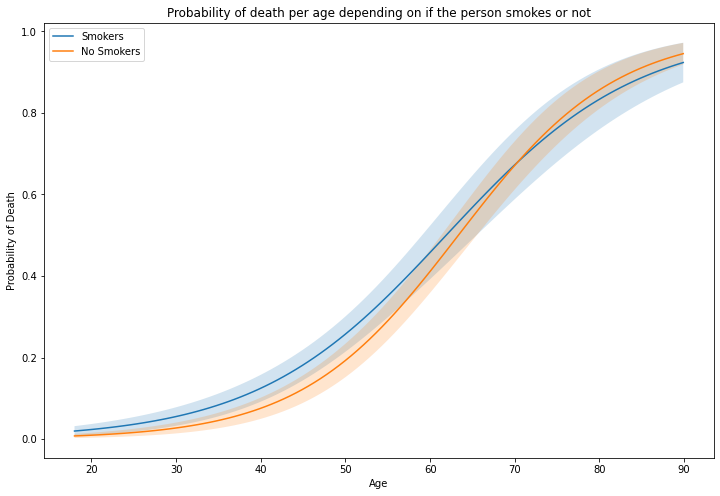

In [27]:
# estimate confidence interval for predicted probabilities
def conf_interval (model, proba, data_pred, labelData): 
    cov = model.cov_params()
    gradient = (
        proba* (1 - proba) * sm.add_constant(data_pred).T
    ).T  # matrix of gradients for each observation
    std_errors = np.array(
        [np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient]
    )
    c = 1.96  # multiplier for confidence interval
    upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
    lower = np.maximum(0, np.minimum(1, proba - std_errors * c))
     

    plt.plot(data_pred, proba, label = labelData)
    plt.fill_between(data_pred, lower, upper, alpha=0.2)
 

plt.figure(figsize=(12, 8))

conf_interval (modelSmok, probaSmok, data_pred, 'Smokers')  
conf_interval (modelNoSmok, probaNoSmok, data_pred, "No Smokers")  

plt.title("Probability of death per age depending on if the person smokes or not")
plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.legend(loc='upper left')
plt.show()


From this last plot, we conclude  with a good confidence (confidence interval is narrow) that the death probability is lower for non-smokers having between 18 and 64 years old. 
From 64 years old, the confidence interval for both smokers and non-smokers become wider (mainly for smokers), which means that we can no longer guarantee that the obtained probabilies are reliable. 